Convolution provides a way of multiplying two arrays to produce a third array. Depending on the designed
filter and the intended effect, the kernel can be a matrix of dimensions, for example, 3x3, 5x5 or 7x7

In [46]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

a) Code a function that takes an input image, performs convolution with a given kernel, and returns the
resulting image.

In [71]:
def ICV_convolution(image, kernel):
    #getting image height and width
    original_img_height = img.shape[0]
    original_img_width = img.shape[1]
    
    #calulating kernel multiplication factor 
    kernel_size = kernel.shape[0]
    
    #creating empty image to store convolution output image 
    final_img = np.zeros([original_img_height - kernel_size//2 + 1,original_img_width - kernel_size//2 + 1,3],dtype=np.uint8)
    
    for i in range(0+(kernel_size//2), original_img_height-(kernel_size//2)):
        for j in range(0+(kernel_size//2), original_img_width-(kernel_size//2)):
            #Red Pixels
            conv_part = img[i-(kernel_size//2):i+(kernel_size//2)+1,j-(kernel_size//2):j+(kernel_size//2)+1,0]
            final_img[i][j][0] = np.sum(conv_part * kernel) // (kernel_size**2) 
            
            #Green Pixels
            conv_part = img[i-(kernel_size//2):i+(kernel_size//2)+1,j-(kernel_size//2):j+(kernel_size//2)+1,1]
            final_img[i][j][1] = np.sum(conv_part * kernel) // (kernel_size**2) 
            
            #Blue Pixels
            conv_part = img[i-(kernel_size//2):i+(kernel_size//2)+1,j-(kernel_size//2):j+(kernel_size//2)+1,2]
            final_img[i][j][2] = np.sum(conv_part * kernel) // (kernel_size**2) 
            
    
            
            
    return final_img
    
    

b) Design a convolution kernel that computes, for each pixel, the average intensity value in a 3x3 region.
Use this kernel and the filtering function above, and save the resulting image. 

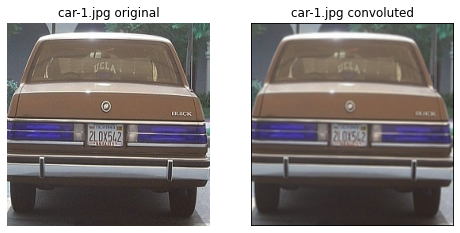

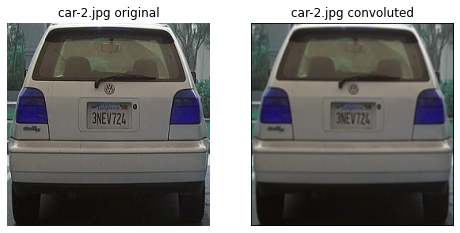

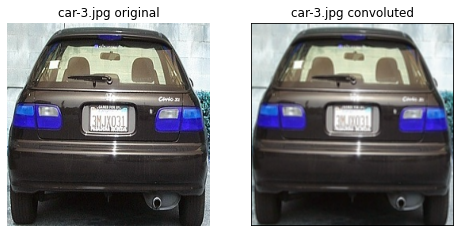

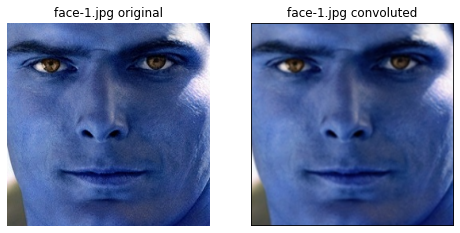

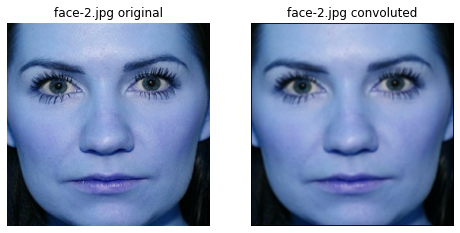

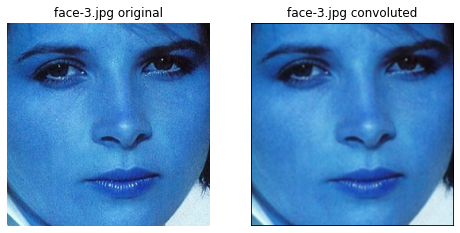

In [73]:
kernel = np.array([[1, 1, 1], 
                  [1, 1, 1],
                  [1, 1, 1]])

images_path = os.getcwd()+'/DatasetA'
for images in os.listdir(images_path):
    if images[-3:]=='jpg':
        images_name = images_path + '/' + images
        img = cv2.imread(images_name)
        convulated_image = ICV_convolution(img, kernel)
    
        f = plt.figure(figsize = (8,8))
        f.add_subplot(1,2, 1)
        plt.axis('off')
        plt.imshow(img)
        plt.title(images + ' original')
        f.add_subplot(1,2, 2)
        plt.axis('off')
        plt.imshow(convulated_image)
        plt.title(images + ' convoluted')
        plt.show()


c) Use the kernels provided below, apply the filtering function and save the resulting images. Comment
on the effect of each kernel.<br>
kernel A<br>
1 2 1<br>
2 4 2<br>
1 2 1<br>
kernel B<br>
0 1 0<br>
1 -4 1<br>
0 1 0<br>


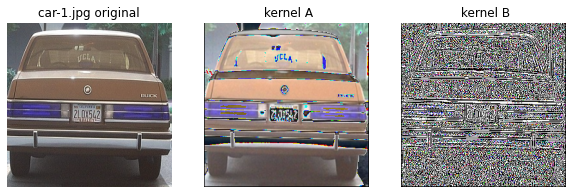

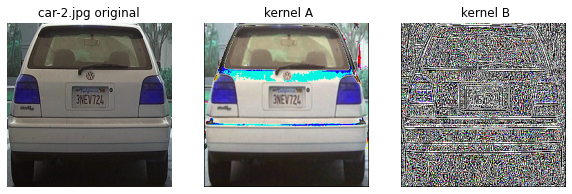

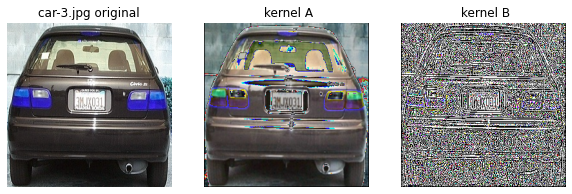

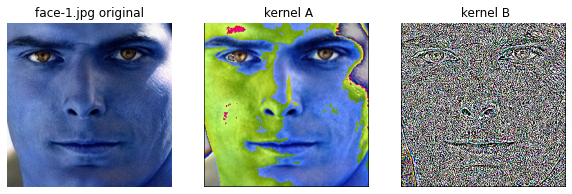

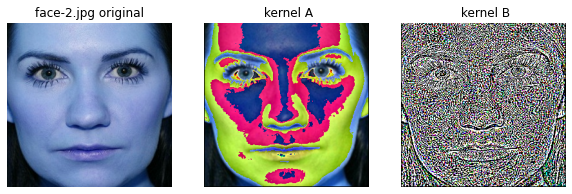

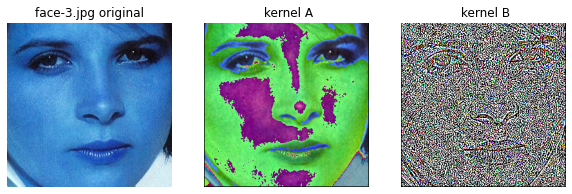

In [74]:
kernel_A = np.array([[1, 2, 1], #gaussian filter
                  [2, 4, 2],
                  [1, 2, 1]])

kernel_B = np.array([[0, 1, 0], #Laplace filter
                  [1, -4, 1],
                  [0, 1, 0]])


images_path = os.getcwd()+'/DatasetA'
for images in os.listdir(images_path):
    if images[-3:]=='jpg':
        images_name = images_path + '/' + images
        img = cv2.imread(images_name)
        
        f = plt.figure(figsize = (10,10))
        
        f.add_subplot(1,3, 1)
        plt.axis('off')
        plt.imshow(img)
        plt.title(images + ' original')
        
        f.add_subplot(1,3, 2)
        plt.axis('off')
        plt.imshow(ICV_convolution(img, kernel_A))
        plt.title(' kernel A')
        
        f.add_subplot(1,3, 3)
        plt.axis('off')
        plt.imshow(ICV_convolution(img, kernel_B))
        plt.title(' kernel B')
        
        plt.show()


d) Use the filtering function for the following filtering operations: (i) A followed by A; (ii) A followed by B;
(iii) B followed by A. Comment the results. 

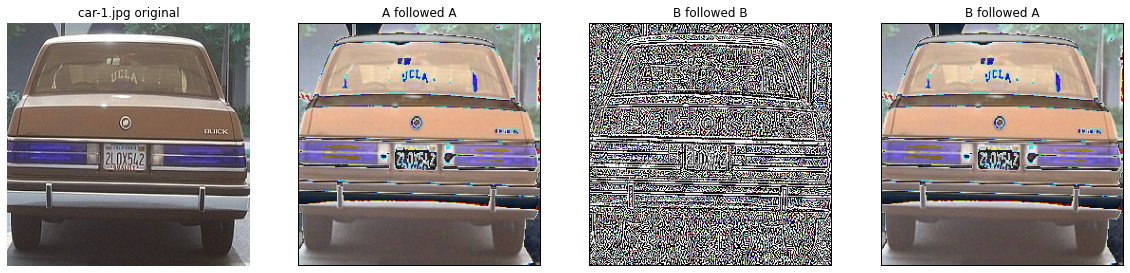

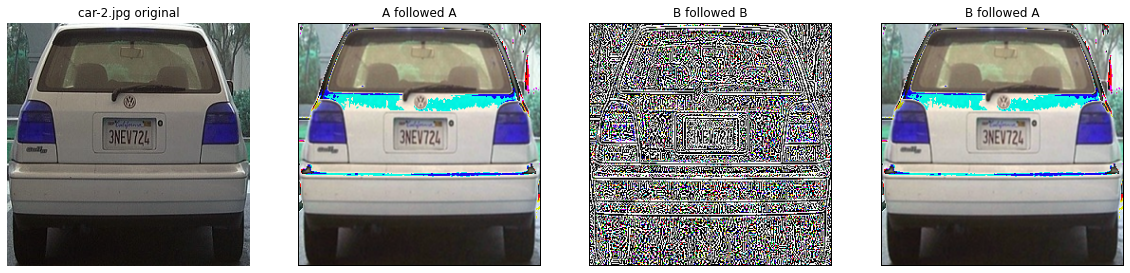

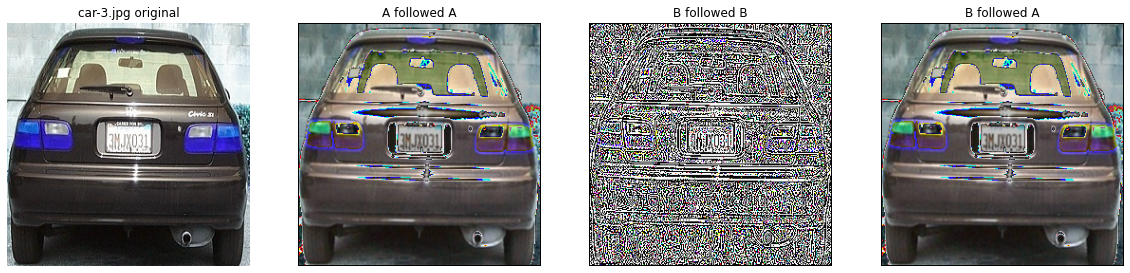

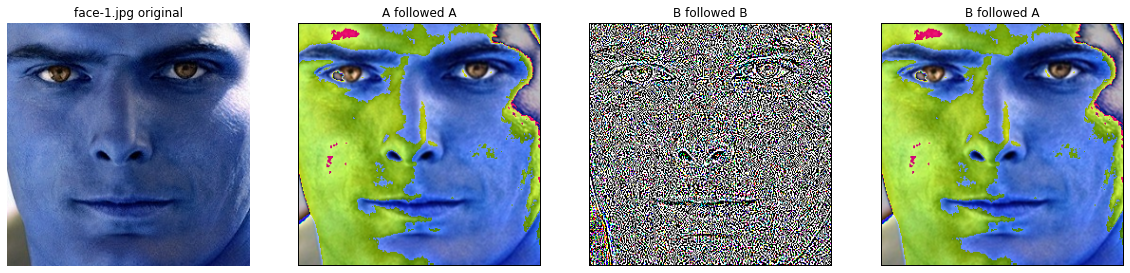

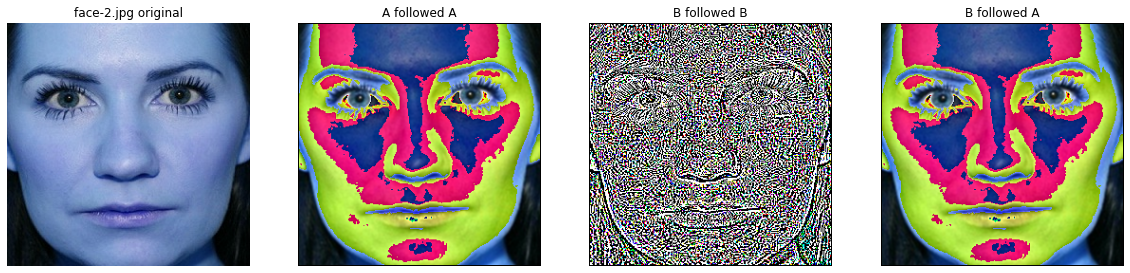

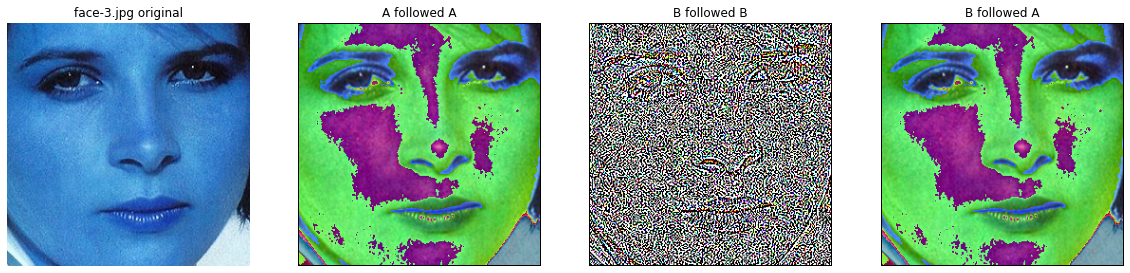

In [75]:
kernel_A = np.array([[1, 2, 1],
                  [2, 4, 2],
                  [1, 2, 1]])

kernel_B = np.array([[0, 1, 0],
                  [1, -4, 1],
                  [0, 1, 0]])


images_path = os.getcwd()+'/DatasetA'
for images in os.listdir(images_path):
    if images[-3:]=='jpg':
        images_name = images_path + '/' + images
        img = cv2.imread(images_name)
        
        f = plt.figure(figsize = (20,20))
        
        f.add_subplot(1, 4, 1)
        plt.axis('off')
        plt.imshow(img)
        plt.title(images + ' original')
        
        f.add_subplot(1, 4, 2)
        plt.axis('off')
        plt.imshow(ICV_convolution(ICV_convolution(img, kernel_A), kernel_A))
        plt.title('A followed A')
        
        f.add_subplot(1, 4, 3)
        plt.axis('off')
        plt.imshow(ICV_convolution(ICV_convolution(img, kernel_B), kernel_B))
        plt.title('B followed B')
        
        f.add_subplot(1, 4, 4)
        plt.axis('off')
        plt.imshow(ICV_convolution(ICV_convolution(img, kernel_B), kernel_A))
        plt.title('B followed A')
        
        plt.show()
